<a href="https://colab.research.google.com/github/GamblerGabbar/House_Price_Prediction/blob/main/HousePrediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Prediction using TensorFlow Decision Forests

# Introduction:
Decision Forests are a family of tree-based models, including Random Forests and Gradient Boosted Trees. These models are well-suited for handling tabular data, offering high interpretability and robust performance. They serve as an excellent starting point for prediction tasks in tabular datasets, often outperforming neural networks or providing a strong baseline before more complex experiments.

In this project, we aim to predict house prices using TensorFlow Decision Forests (TFDF), leveraging its efficiency and ease of implementation for decision-tree-based models.

# import lib

In [1]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow_decision_forests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 43.4 MB/s eta 0:0

In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from google.colab import files

# Prompt to upload file
uploaded = files.upload()

# Assuming you uploaded 'house_prices.csv'
import pandas as pd

# Load the file
df = pd.read_csv('train.csv')
print(df.head())


Saving train.csv to train.csv
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sal

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("Full train dataset shape is {}".format(df.shape))

Full train dataset shape is (1460, 81)


In [6]:
df = df.drop('Id', axis=1)
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# House Price Distribution
Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

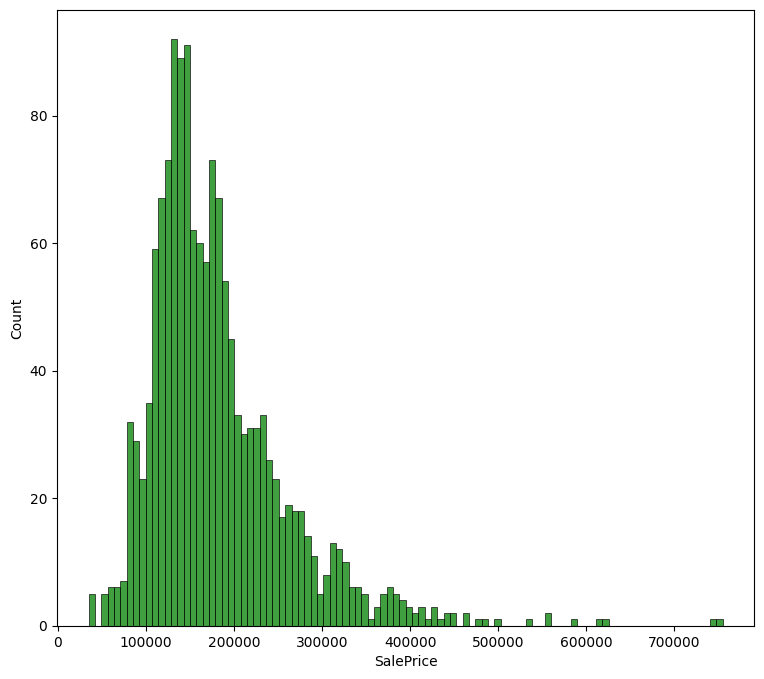

In [8]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
# sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})
# sns.displot(df['SalePrice'], color='g', bins=100, kind='hist')
sns.histplot(df['SalePrice'], color='g', bins=100)

# Numerical data distribution
We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [9]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [10]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


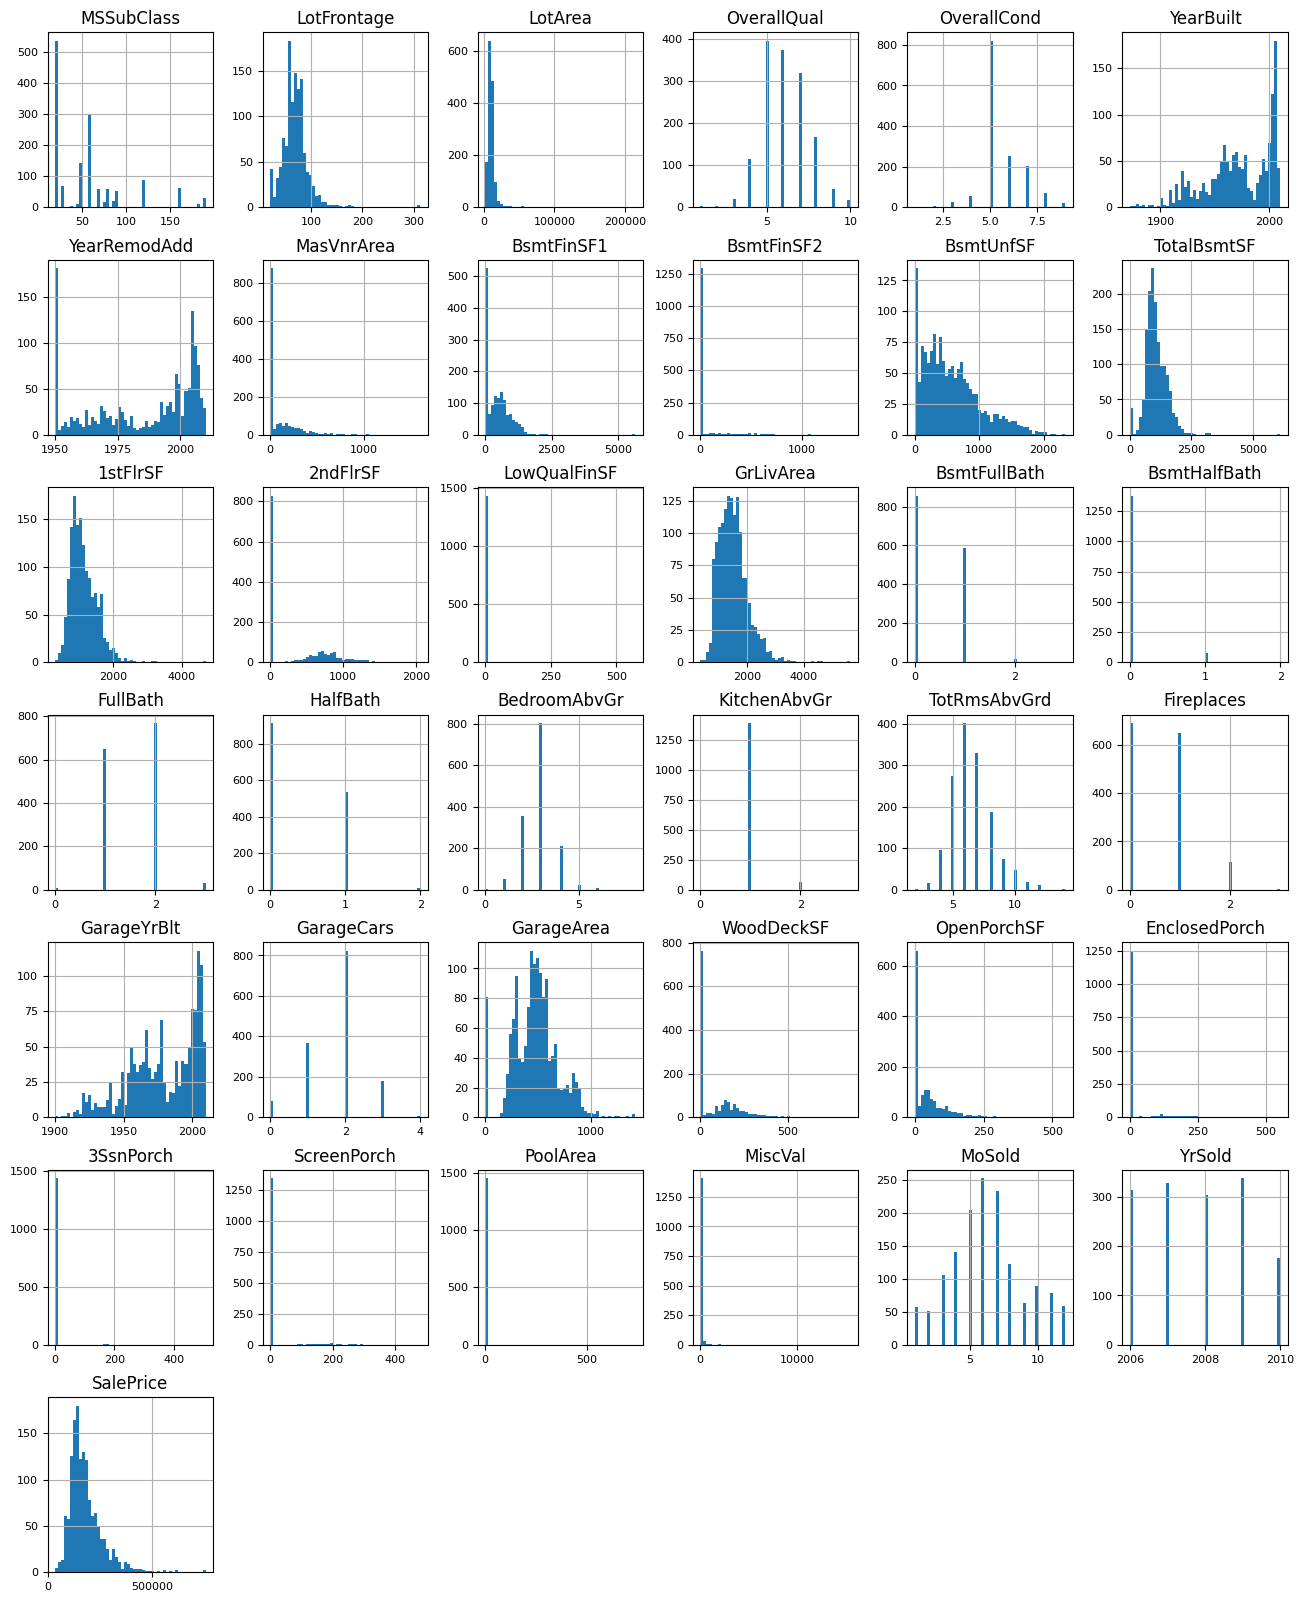

In [11]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# TensorFlow Decision Forests (TF-DF)
supports a mix of numerical, categorical, and missing data natively. One of the key advantages of decision tree-based models is that they can handle these different data types without requiring the extensive preprocessing that other machine learning models (like neural networks) often need.


Steps to Prepare Dataset:
Handle Missing Values:
As TF-DF can handle missing values natively, we don't need to explicitly fill or drop them, but we might want to examine the missingness pattern and decide if any imputation or removal of features with too many missing values is necessary. For now, we will proceed without removing or imputing missing values.

Categorical Data:
TF-DF automatically handles categorical features, so we do not need to encode them as we would in some other models. It will convert categorical variables to integer representations internally.

Target Variable:
The target variable (SalePrice) needs to be separated from the features when training the model.

In [12]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(len(train_ds_pd), len(valid_ds_pd)))

1024 examples in training, 436 examples in testing.


The dataset is initially in a Pandas DataFrame format, but TensorFlow Decision Forests (TF-DF) requires the data to be in the tf.data.Dataset format for efficient training, especially when using GPUs or TPUs.

To convert the Pandas DataFrame into the required format, we use tfdf.keras.pd_dataframe_to_tf_dataset(). Additionally, since this is a regression problem (we are predicting house prices), we explicitly specify the task as tfdf.keras.Task.REGRESSION.

In [13]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

# Select a Model

 TensorFlow Decision Forests (TF-DF) offers several tree-based models to choose from. Here are the available models:

# 1. RandomForestModel:
A collection of decision trees trained independently on random subsets of the training data. It is robust to overfitting and easy to use.
# 2. GradientBoostedTreesModel:
This model builds trees sequentially, where each tree corrects the errors of the previous one. It's powerful for improving prediction accuracy but may require more tuning.
# 3. CartModel:
The standard decision tree model (CART stands for Classification and Regression Trees). Simpler than Random Forest and Gradient Boosting but may not perform as well on complex tasks.
# 4. DistributedGradientBoostedTreesModel:
A distributed version of the Gradient Boosted Trees model, designed to scale across multiple systems for large datasets.

To list all available models in TensorFlow Decision Forests, we can use the following code:


In [14]:
# List all available models in TensorFlow Decision Forests
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [15]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmpcugsugia as temporary training directory


# Train the model

In [16]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:06.464011. Found 1024 examples.
Training model...
Model trained in 0:00:04.088645
Compiling model...
Model compiled.


**Visualize the model**
One benefit of tree-based models is that we can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [17]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

Evaluate the model on the **Out of bag (OOB)** data and the validation dataset
Before training the dataset we have manually seperated 20% of the dataset for validation named as valid_ds.

We can also use Out of bag (OOB) score to validate our RandomForestModel. To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.


The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.

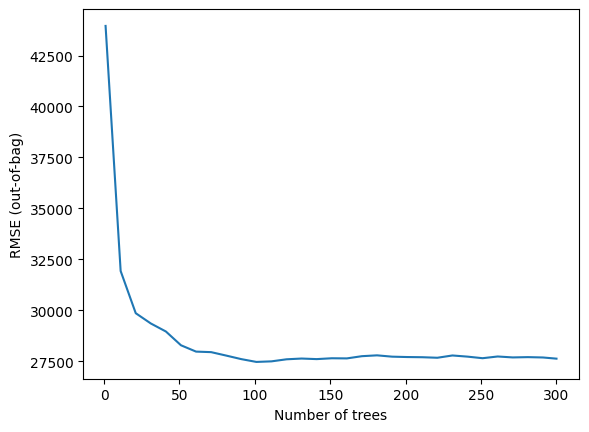

In [18]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [19]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1024, accuracy=None, loss=None, rmse=27623.256258629037, ndcg=None, aucs=None, auuc=None, qini=None)

# Now, let us run an evaluation using the validation dataset.

In [20]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 667ms/step - loss: 0.0000e+00 - mse: 936288384.0000
loss: 0.0000
mse: 936288384.0000


**Variable importances**

Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests. Let us list the available Variable Importances for Decision Trees:

In [21]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


**NUM_NODES:**

The number of times a feature is used in the decision nodes across all trees.
Indicates how frequently the feature contributes to decisions in the model.

**SUM_SCORE:**

The cumulative importance score of a feature across all trees.
Useful for understanding overall feature influence.

**MEAN_MIN_DEPTH:**

The average depth at which a feature is used in the trees.
Features used closer to the root of the trees (lower depth) are typically more important.

**INV_MEAN_MIN_DEPTH:**

The inverse of the mean minimum depth.
Higher values indicate more influential features.

In [22]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 97.0),
 ("Neighborhood" (4; #59), 56.0),
 ("GarageCars" (1; #32), 55.0),
 ("ExterQual" (4; #22), 33.0),
 ("GrLivArea" (1; #38), 17.0),
 ("BsmtQual" (4; #14), 12.0),
 ("GarageArea" (1; #31), 11.0),
 ("YearBuilt" (1; #76), 8.0),
 ("TotalBsmtSF" (1; #73), 5.0),
 ("GarageYrBlt" (1; #37), 2.0),
 ("KitchenQual" (4; #44), 2.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("BsmtFinSF1" (1; #8), 1.0)]

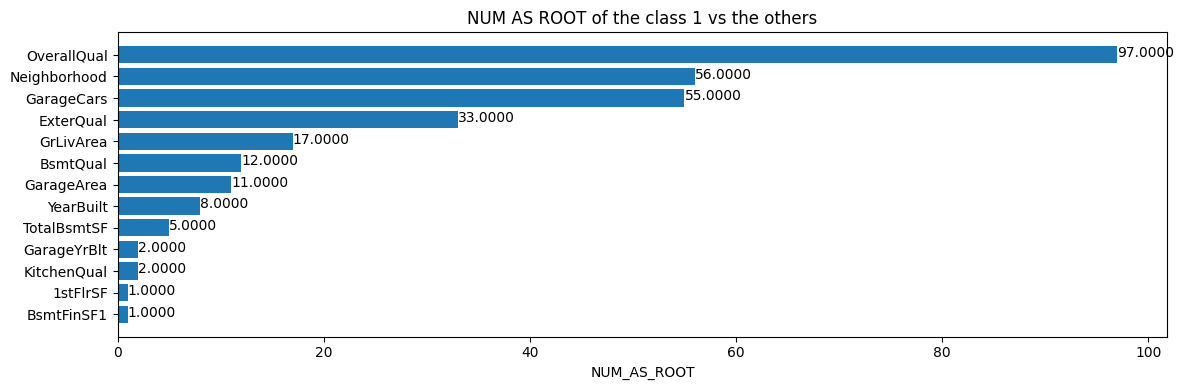

In [23]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()


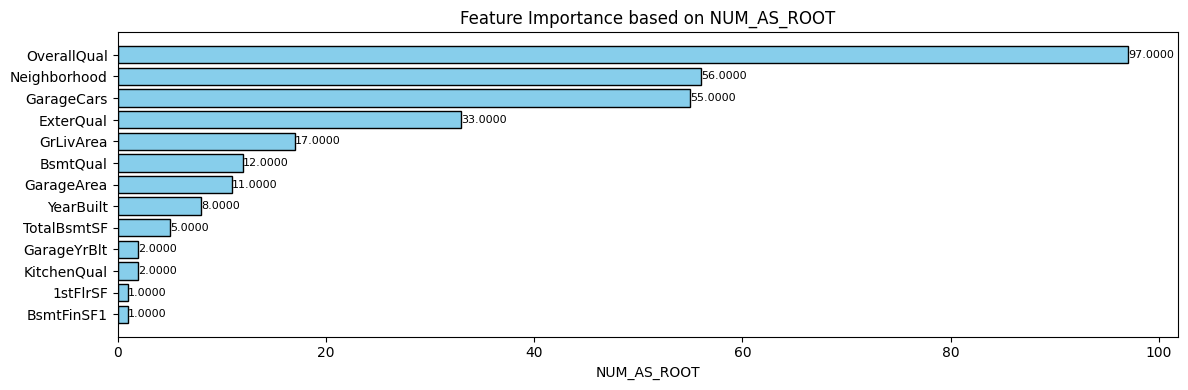

In [24]:
import matplotlib.pyplot as plt

# Variable importance metric
variable_importance_metric = "NUM_AS_ROOT"

# Ensure the metric exists
if variable_importance_metric in inspector.variable_importances():
    variable_importances = inspector.variable_importances()[variable_importance_metric]

    # Extract feature names and importance values
    feature_names = [vi[0].name for vi in variable_importances]
    feature_importances = [vi[1] for vi in variable_importances]
    feature_ranks = range(len(feature_names))

    # Plot variable importances
    plt.figure(figsize=(12, 4))
    bar = plt.barh(feature_ranks, feature_importances, color="skyblue", edgecolor="black")
    plt.yticks(feature_ranks, feature_names)
    plt.gca().invert_yaxis()

    # Label each bar with values
    for importance, patch in zip(feature_importances, bar.patches):
        plt.text(
            patch.get_width() + 0.01,  # Adjust for positioning
            patch.get_y() + patch.get_height() / 2,
            f"{importance:.4f}",
            va="center",
            fontsize=8
        )

    plt.xlabel(variable_importance_metric)
    plt.title("Feature Importance based on NUM_AS_ROOT")
    plt.tight_layout()
    plt.show()
else:
    print(f"Metric '{variable_importance_metric}' not found in variable importances.")


In [25]:
from google.colab import files

# Prompt to upload file
uploaded = files.upload()

# Assuming you uploaded 'house_prices.csv'
import pandas as pd
test_data = pd.read_csv('test.csv')
test_data1 = pd.read_csv('test.csv')
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data,task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,'SalePrice': preds.squeeze()})

output.head()

Saving test.csv to test.csv
2/2 [==============================] - 1s 24ms/step


,Id,SalePrice
0,1461,127172.484375
1,1462,157010.640625
2,1463,179401.406250
3,1464,182214.484375
4,1465,194561.500000


In [26]:
test_data1['expected_sales_price'] = preds.squeeze()
# Save the updated DataFrame to a CSV file
output_file = 'test_with_expected_sales.csv'
test_data1.to_csv(output_file, index=False)

# Download the file
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
rf1 = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=500,        # Increase the number of trees
    max_depth=15,         # Set the maximum depth of the trees
    min_examples=5,       # Minimum examples per leaf to avoid overf1itting
)
rf1.compile(metrics=["mse"])
rf1.fit(x=train_ds)


Use /tmp/tmpobdgyavq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.036690. Found 1024 examples.
Training model...
Model trained in 0:00:04.750329
Compiling model...
Model compiled.


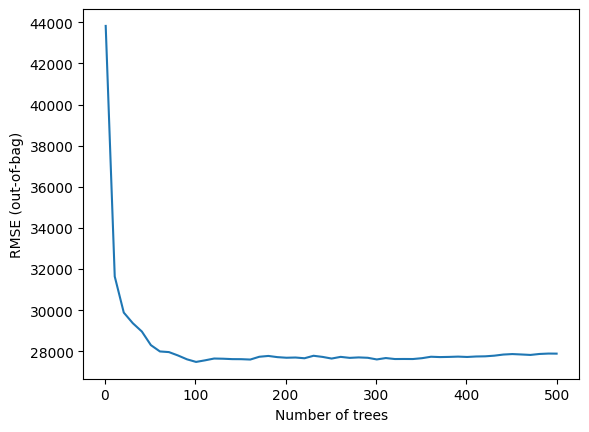

In [28]:
import matplotlib.pyplot as plt
logs = rf1.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [29]:
inspector = rf1.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1024, accuracy=None, loss=None, rmse=27884.204903418762, ndcg=None, aucs=None, auuc=None, qini=None)

In [30]:
import numpy as np
from itertools import product

# Define the hyperparameter grid
param_grid = {
    "num_trees": [100, 300, 500],      # Number of trees
    "max_depth": [10, 15, 20],        # Maximum depth of trees
    "min_examples": [1, 5, 10]        # Minimum examples per leaf
}

# Create all combinations of hyperparameters
param_combinations = list(product(param_grid["num_trees"],
                                  param_grid["max_depth"],
                                  param_grid["min_examples"]))

# Initialize variables to store the best configuration
best_mse = float('inf')
best_params = None
results = []

# Grid search loop
for num_trees, max_depth, min_examples in param_combinations:
    print(f"Training with num_trees={num_trees}, max_depth={max_depth}, min_examples={min_examples}")

    # Create and compile the model with current parameters
    rf = tfdf.keras.RandomForestModel(
        task=tfdf.keras.Task.REGRESSION,
        num_trees=num_trees,
        max_depth=max_depth,
        min_examples=min_examples
    )
    rf.compile(metrics=["mse"])

    # Train the model
    rf.fit(x=train_ds, verbose=0)  # Set verbose=0 to suppress training output

    # Evaluate on the validation set
    evaluation = rf.evaluate(x=valid_ds, return_dict=True)
    mse = evaluation["mse"]
    results.append((num_trees, max_depth, min_examples, mse))

    print(f"Validation MSE: {mse:.4f}")

    # Update the best parameters if this configuration is better
    if mse < best_mse:
        best_mse = mse
        best_params = (num_trees, max_depth, min_examples)

# Print the best configuration
print("\nBest Hyperparameters:")
print(f"num_trees: {best_params[0]}, max_depth: {best_params[1]}, min_examples: {best_params[2]}")
print(f"Best Validation MSE: {best_mse:.4f}")

# Optionally save results for analysis
import pandas as pd
results_df = pd.DataFrame(results, columns=["num_trees", "max_depth", "min_examples", "mse"])
results_df.to_csv("grid_search_results.csv", index=False)


Training with num_trees=100, max_depth=10, min_examples=1
Use /tmp/tmpqjidlpwd as temporary training directory
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - mse: 916740800.0000
Validation MSE: 916740800.0000
Training with num_trees=100, max_depth=10, min_examples=5
Use /tmp/tmp7d7v9few as temporary training directory


1/1 [==============================] - 0s 401ms/step - loss: 0.0000e+00 - mse: 970518848.0000
Validation MSE: 970518848.0000
Training with num_trees=100, max_depth=10, min_examples=10
Use /tmp/tmpd0tgu8jz as temporary training directory


1/1 [==============================] - 0s 393ms/step - loss: 0.0000e+00 - mse: 993618048.0000
Validation MSE: 993618048.0000
Training with num_trees=100, max_depth=15, min_examples=1
Use /tmp/tmpfzy1dlcf as temporary training directory


1/1 [==============================] - 1s 680ms/step - loss: 0.0000e+00 - mse: 933569472.0000
Validation MSE: 933569472.0000
Training with num_trees=100, max_depth=15, min_examples=5
Use /tmp/tmpo51aa_9j as temporary training directory


1/1 [==============================] - 0s 404ms/step - loss: 0.0000e+00 - mse: 966249280.0000
Validation MSE: 966249280.0000
Training with num_trees=100, max_depth=15, min_examples=10
Use /tmp/tmpi4zxz2ee as temporary training directory
1/1 [==============================] - 0s 389ms/step - loss: 0.0000e+00 - mse: 985481088.0000
Validation MSE: 985481088.0000
Training with num_trees=100, max_depth=20, min_examples=1
Use /tmp/tmptq0jn2s4 as temporary training directory
1/1 [==============================] - 0s 496ms/step - loss: 0.0000e+00 - mse: 918085184.0000
Validation MSE: 918085184.0000
Training with num_trees=100, max_depth=20, min_examples=5
Use /tmp/tmpstvi0lct as temporary training directory
1/1 [==============================] - 0s 405ms/step - loss: 0.0000e+00 - mse: 959431616.0000
Validation MSE: 959431616.0000
Training with num_trees=100, max_depth=20, min_examples=10
Use /tmp/tmp8iwqd8u2 as temporary training directory
1/1 [==============================] - 1s 1s/step - lo

In [31]:
rf_draft = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=300,        # Increase the number of trees
    max_depth=20,         # Set the maximum depth of the trees
    min_examples=1       # Minimum examples per leaf to avoid overf1itting
)
rf_draft.compile(metrics=["mse"])
rf_draft.fit(x=train_ds)


Use /tmp/tmpjewey6uw as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.105511. Found 1024 examples.
Training model...
Model trained in 0:00:08.776187
Compiling model...
Model compiled.


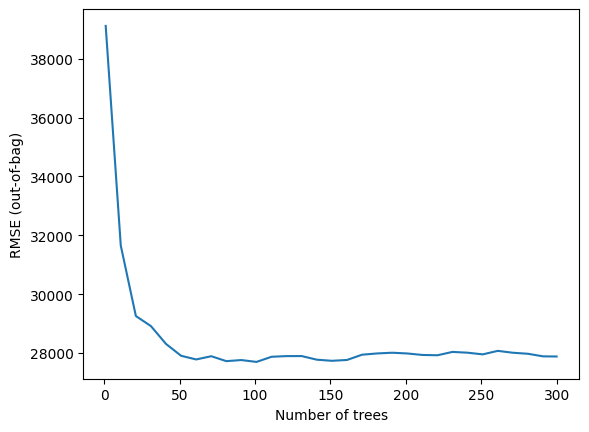

In [32]:
import matplotlib.pyplot as plt
logs = rf_draft.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [33]:
inspector = rf_draft.make_inspector()
inspector.evaluation()
#



Evaluation(num_examples=1024, accuracy=None, loss=None, rmse=27883.60316659536, ndcg=None, aucs=None, auuc=None, qini=None)

In [34]:
evaluation = rf_draft.evaluate(x=valid_ds,return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 438ms/step - loss: 0.0000e+00 - mse: 909750336.0000
loss: 0.0000
mse: 909750336.0000


In [35]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 91.0),
 ("Neighborhood" (4; #59), 58.0),
 ("GarageCars" (1; #32), 54.0),
 ("ExterQual" (4; #22), 31.0),
 ("GrLivArea" (1; #38), 19.0),
 ("BsmtQual" (4; #14), 14.0),
 ("GarageArea" (1; #31), 13.0),
 ("YearBuilt" (1; #76), 8.0),
 ("TotalBsmtSF" (1; #73), 7.0),
 ("GarageYrBlt" (1; #37), 2.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("BsmtFinSF1" (1; #8), 1.0),
 ("KitchenQual" (4; #44), 1.0)]

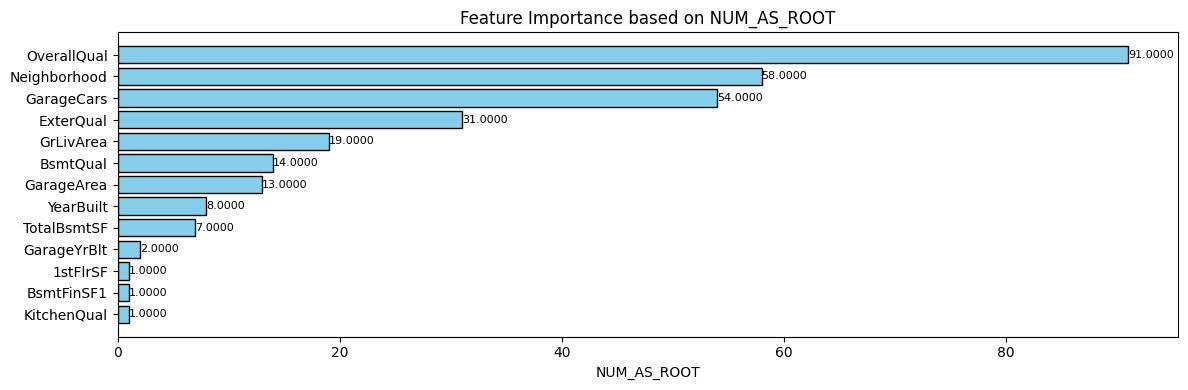

In [36]:
import matplotlib.pyplot as plt

# Variable importance metric
variable_importance_metric = "NUM_AS_ROOT"

# Ensure the metric exists
if variable_importance_metric in inspector.variable_importances():
    variable_importances = inspector.variable_importances()[variable_importance_metric]

    # Extract feature names and importance values
    feature_names = [vi[0].name for vi in variable_importances]
    feature_importances = [vi[1] for vi in variable_importances]
    feature_ranks = range(len(feature_names))

    # Plot variable importances
    plt.figure(figsize=(12, 4))
    bar = plt.barh(feature_ranks, feature_importances, color="skyblue", edgecolor="black")
    plt.yticks(feature_ranks, feature_names)
    plt.gca().invert_yaxis()

    # Label each bar with values
    for importance, patch in zip(feature_importances, bar.patches):
        plt.text(
            patch.get_width() + 0.01,  # Adjust for positioning
            patch.get_y() + patch.get_height() / 2,
            f"{importance:.4f}",
            va="center",
            fontsize=8
        )

    plt.xlabel(variable_importance_metric)
    plt.title("Feature Importance based on NUM_AS_ROOT")
    plt.tight_layout()
    plt.show()
else:
    print(f"Metric '{variable_importance_metric}' not found in variable importances.")


In [37]:
from google.colab import files

# Prompt to upload file
uploaded = files.upload()

# Assuming you uploaded 'house_prices.csv'
import pandas as pd
test_data = pd.read_csv('test.csv')
test_data1 = pd.read_csv('test.csv')
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data,task = tfdf.keras.Task.REGRESSION)

preds = rf_draft.predict(test_ds)
output = pd.DataFrame({'Id': ids,'SalePrice': preds.squeeze()})

output.head()

Saving test.csv to test (1).csv
2/2 [==============================] - 1s 34ms/step


,Id,SalePrice
0,1461,128717.867188
1,1462,157146.437500
2,1463,179886.875000
3,1464,184516.828125
4,1465,192833.421875


from matplotlib import pyplot as plt
_df_0['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SalePrice'].plot(kind='hist', bins=20, title='SalePrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Id', y='SalePrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Id'}, axis=1)
              .sort_values('Id', ascending=True))
  xs = counted['Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SalePrice']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SalePrice'}, axis=1)
              .sort_values('SalePrice', ascending=True))
  xs = counted['SalePrice']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('SalePrice', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SalePrice')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['SalePrice'].plot(kind='line', figsize=(8, 4), title='SalePrice')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
test_data1['expected_sales_price'] = preds.squeeze()
# Save the updated DataFrame to a CSV file
output_file = 'test_with_expected_sales.csv'
test_data1.to_csv(output_file, index=False)

# Download the file
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>